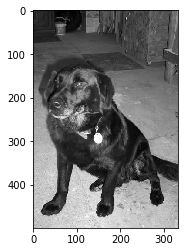

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/Users/Tom/Desktop/Coding/datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

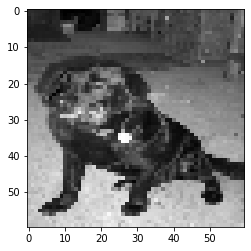

In [2]:
IMG_SIZE = 60

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    
create_training_data()

In [4]:
print(len(training_data))

24946


In [5]:
import random

random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
0
1
1
0
1


In [7]:
X =[]
y= []

In [8]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [9]:
np.save('features.npy',X)
np.save('labels.npy',y)

In [10]:
X = np.load('features.npy')
y = np.load('labels.npy')